In [46]:
#~~~~~'_'~'_'~/////+*+*+*+*////-------------LIBRERIAS-------------\\\*+*+*+\\\\\'_'~'_'~~~~~~

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import random


In [47]:
#~~~~~'_'~'_'~/////+*+*+*+*////-------------SE CARGA LA IMAGEN-------------\\\*+*+*+\\\\\'_'~'_'~~~~~~

def cargarImagen(nombre):
     imagen = cv2.imread(nombre,1)
     imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
     plt.imshow(imagen)
     return imagen

In [48]:
#~~~~~'_'~'_'~/////+*+*+*+*////-------------REDIMENCION-------------\\\*+*+*+\\\\\'_'~'_'~~~~~~

def redimension(imagen, alto, ancho):
     imagen = cv2.resize(imagen, (ancho, alto))
     return imagen

In [49]:
#~~~~~'_'~'_'~/////+*+*+*+*////-------------HISTOGRAMA-------------\\\*+*+*+\\\\\'_'~'_'~~~~~~

def histograma(imagen):
      alto, ancho, _ = imagen.shape
      arr_r = np.asarray(imagen[:, :, 0])
      arr_g = np.asarray(imagen[:, :, 1])
      arr_b = np.asarray(imagen[:, :, 2])
      his_r = np.zeros((256))
      his_g = np.zeros((256))
      his_b = np.zeros((256))
      cont = np.zeros((256))

      for i in range(256):
          for j in range(alto):
              for k in range(ancho):
                  if arr_r[j, k] == i:
                      his_r[i] += 1
                  if arr_g[j, k] == i:
                      his_g[i] += 1
                  if arr_b[j, k] == i:
                      his_b[i] += 1
          cont[i] = i

      plt.plot(cont, his_r, color="r")
      plt.plot(cont, his_g, color="g")
      plt.plot(cont, his_b, color="b")
      plt.show()


In [50]:
#~~~~~'_'~'_'~/////+*+*+*+*////-------------RECORTE DE LA IMAGEN-------------\\\*+*+*+\\\\\'_'~'_'~~~~~~


def recortarImagen(img, x1, x2, y1, y2):
     imagen = img[x1:x2, y1:y2]
     plt.imshow(imagen)
     return imagen

In [51]:
#~~~~~'_'~'_'~/////+*+*+*+*////-------------CONVERSION A GRISES-------------\\\*+*+*+\\\\\'_'~'_'~~~~~~

def conversionGrises(recorte):
     gris = recorte.copy()
     for x in range(gris.shape[0]):
         for y in range(gris.shape[1]):
             r = int(gris[x, y, 0] * 0.21)
             g = int(gris[x, y, 1] * 0.72)
             b = int(gris[x, y, 2] * 0.07)
             gr = r + g + b
             gris[x, y] = [gr, gr, gr]

     plt.imshow(gris, cmap='gray')
     plt.show()
     return gris

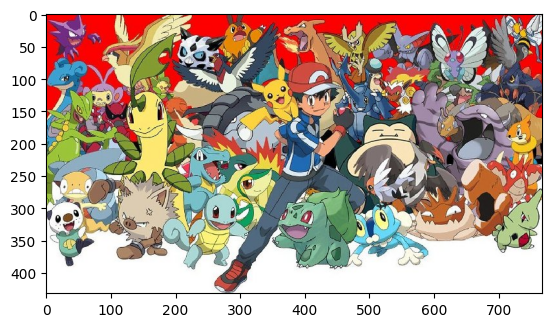

In [52]:
#~~~~~'_'~'_'~/////+*+*+*+*////-------------PRINCIPAL-------------\\\*+*+*+\\\\\'_'~'_'~~~~~~

#Se carga la imagen.
img = cargarImagen('poke.jpg')
#Se redimenciona.
img = redimension(img, 240, 320)


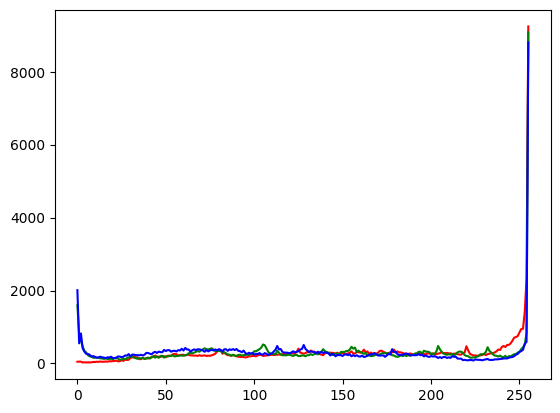

In [53]:
#Se hace histograma.
histograma(img)

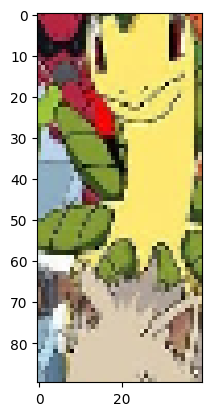

In [54]:
#Se secorta.
recorte = recortarImagen(img, 80, 170, 40, 80)

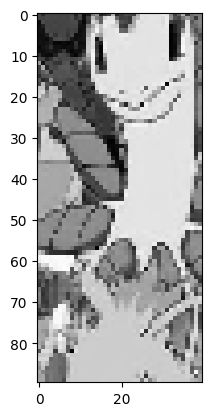

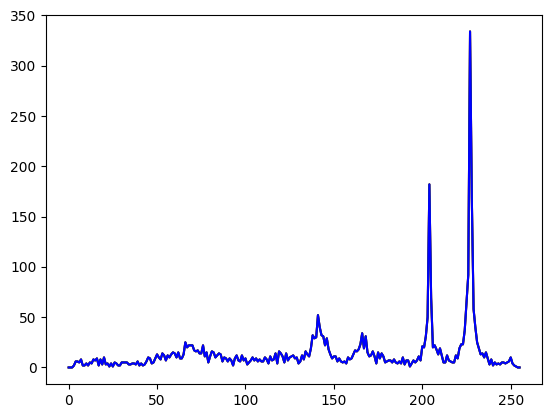

In [55]:
#Se convierte a grises.
gris = conversionGrises(recorte)
#Se hace histograma en grises.
histograma(gris)

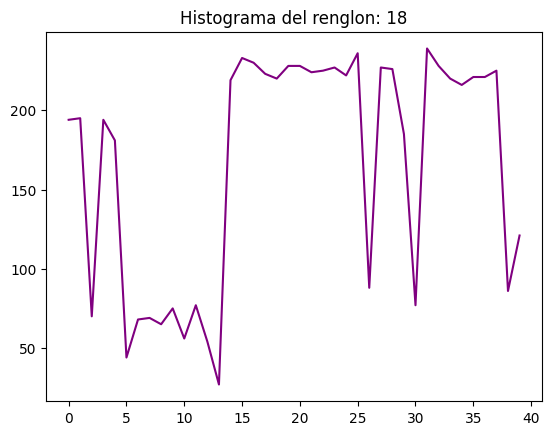

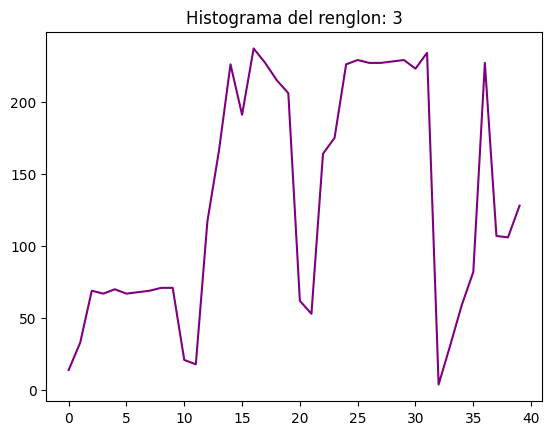

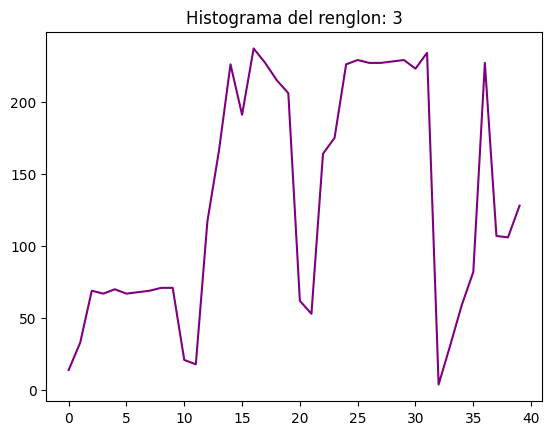

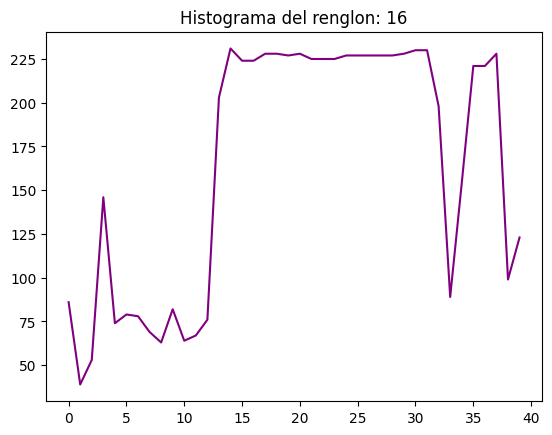

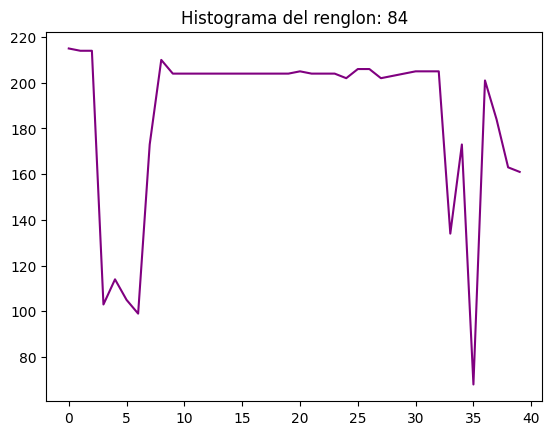

In [56]:
# Se hacen histogramas de 5 filas al azar.
lista = [random.randint(1, 90) for _ in range(5)]
for i in range(len(lista)):
    for j in range(gris.shape[0]):
        if j == lista[i]:
            cont = []
            valores = []
            for k in range(gris.shape[1]):
                valores.append(gris[j, k, 0])
                cont.append(k)
            # Generar el título dinámico
            titulo = "Histograma del renglon: {}".format(lista[i])
            plt.title(titulo)  # Establecer el título
            plt.plot(cont, valores, color="purple")
            plt.show()